In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#https://stackoverflow.com/questions/52305578/sift-cv2-xfeatures2d-sift-create-not-working-even-though-have-contrib-instal
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

# of keypoints: 201


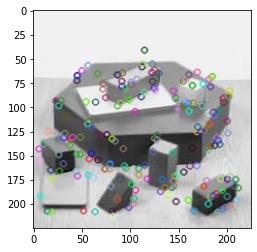

(<matplotlib.image.AxesImage at 0x7fbdc1706f28>, None)

In [9]:
#SIFT
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Lesson04_IP.rar (Unzipped Files)/Images_New/simple.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
kps = sift.detect(gray,None)
print("# of keypoints: {}".format(len(kps)))
img2 = cv2.drawKeypoints(img, kps, None)
#img2 = cv2.drawKeypoints(img, kp, None, color=(255,0,0))
cv2.imwrite('sift_keypoints.jpg',img2)
plt.imshow(img2),plt.show()

In [15]:
#SIFT
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Lesson04_IP.rar (Unzipped Files)/Images_New/simple.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
(kps, descs) = sift.detectAndCompute(gray,None)
print("# kps: {}, descriptors: {}".format(len(kps), descs.shape))

# kps: 201, descriptors: (201, 128)


In [16]:
#SURF
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Lesson04_IP.rar (Unzipped Files)/Images_New/simple.jpg')
surf = cv2.xfeatures2d.SURF_create()
(kps, descs) = surf.detectAndCompute(gray, None)
print("# kps: {}, descriptors: {}".format(len(kps), descs.shape))
print(surf.getHessianThreshold())
# We set it to some 50000. Remember, it is just for representing in picture.
# In actual cases, it is better to have a value 300-500
surf.setHessianThreshold(500)
(kps, descs) = surf.detectAndCompute(gray, None)
print("# kps: {}, descriptors: {}".format(len(kps), descs.shape))

# kps: 219, descriptors: (219, 64)
100.0
# kps: 139, descriptors: (139, 64)


Threshold:  10
nonmaxSuppression:  True
neighborhood:  2
Total Keypoints with nonmaxSuppression:  408


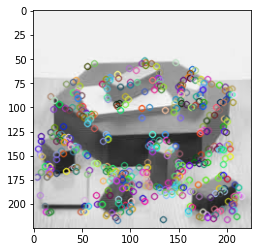

(<matplotlib.image.AxesImage at 0x7fbdc15dc710>, None)

In [17]:
#FAST
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Lesson04_IP.rar (Unzipped Files)/Images_New/simple.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create()
# find and draw the keypoints
kps = fast.detect(gray,None)
img2 = cv2.drawKeypoints(img,kps,None)
# Print all default params
print("Threshold: ", fast.getThreshold())
print("nonmaxSuppression: ", fast.getNonmaxSuppression())
print("neighborhood: ", fast.getType())
print("Total Keypoints with nonmaxSuppression: ", len(kps))
cv2.imwrite('fast_true.png',img2)
plt.imshow(img2),plt.show()

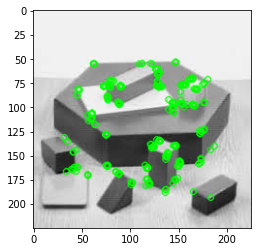

(<matplotlib.image.AxesImage at 0x7fbdc1547128>, None)

In [18]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Lesson04_IP.rar (Unzipped Files)/Images_New/simple.jpg',0)
# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints with ORB
kps = orb.detect(img,None)
# compute the descriptors with ORB
kps, des = orb.compute(img, kps)
# kps, des = orb.detectAndCompute(img)
# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img, kps, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

In [19]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Lesson04_IP.rar (Unzipped Files)/Images_New/simple.jpg')
kaze = cv2.KAZE_create()
(kps, descs) = kaze.detectAndCompute(gray, None)
print("# kps: {}, descriptors: {}".format(len(kps), descs.shape))
akaze = cv2.AKAZE_create()
(kps, descs) = akaze.detectAndCompute(gray, None)
print("# kps: {}, descriptors: {}".format(len(kps), descs.shape))
brisk = cv2.BRISK_create()
(kps, descs) = brisk.detectAndCompute(gray, None)
print("# kps: {}, descriptors: {}".format(len(kps), descs.shape))

# kps: 233, descriptors: (233, 64)
# kps: 91, descriptors: (91, 61)
# kps: 97, descriptors: (97, 64)
